In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import requests

In [2]:
import geopandas as gpd
from shapely.geometry import box

# Define the bounding box coordinates (min_lon, min_lat, max_lon, max_lat)
min_lon, min_lat, max_lon, max_lat = -25, 10, -10, 30

# Create a bounding box geometry
bounding_box = box(min_lon, min_lat, max_lon, max_lat)

# Create a GeoDataFrame and save it
#gdf = gpd.GeoDataFrame({'geometry': [bounding_box]})
#gdf.set_crs(epsg=4326, inplace=True)  # Set coordinate reference system
#gdf.to_file('~/proj_2025_sdm/contributors/fred/data/BoundingBox.shp')
#!pip install geopandas shapely


In [3]:
# Step 1: Load the region info
region_path = '~/proj_2025_sdm/contributors/fred/data/BoundingBox.shp'
extent_polygon = gpd.read_file(region_path)

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the downloaded shapefile (adjust the path to where you saved it)
world = gpd.read_file('~/proj_2025_sdm/contributors/fred/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')



In [44]:
pip install pyobis

Note: you may need to restart the kernel to use updated packages.


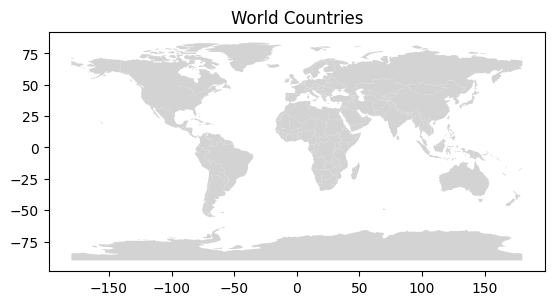

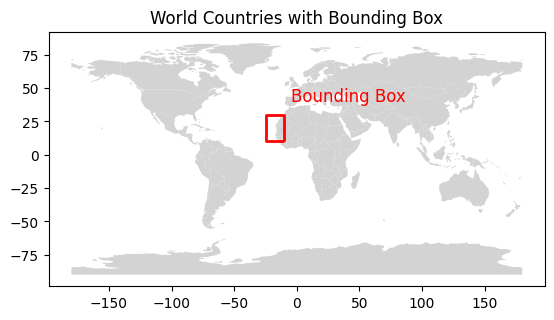

In [5]:
# Convert bounding box to GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bounding_box], crs=world.crs)

# Plot the data
fig, ax = plt.subplots()
world.plot(ax=ax, color='lightgrey')
bbox_gdf.plot(ax=ax, color='none', edgecolor='red', linewidth=2)  # Plot the bounding box

# Add title and annotations
plt.title('World Countries with Bounding Box')
plt.annotate('Bounding Box', xy=(-5, 40), fontsize=12, color='red')  # Adjust coordinates as needed
plt.show()

In [6]:
# Step 3: Define turtle species
species = [
    "Sardinella aurita"
]

In [19]:
# Step 6: Get occurrence data from OBIS
def get_obis_data(species, geometry):
    occurrences = occurrences.search(
        scientificname=species,
        geometry=geometry,size=10
    )
    return occurrences

In [18]:
data = occurrences.search(scientificname="Mola mola", size=10).execute()
occurrences.search(
    geometry="POLYGON((30.1 10.1, 10 20, 20 40, 40 40, 30.1 10.1))", size=20
)

2025-08-04 15:42:58 - pyobis.obisutils - INFO - 10 to be fetched. Estimated time =1.2287152969837190 seconds
2025-08-04 15:42:58 - pyobis.obisutils - INFO - Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 10/10
2025-08-04 15:42:59 - pyobis.obisutils - INFO - Fetched 10 records.
2025-08-04 15:43:02 - pyobis.obisutils - INFO - 20 to be fetched. Estimated time =3.119854005575180 seconds


In [20]:
from pyobis import occurrences

# Fetch the data
geometry_wkt = f'POLYGON(({min_lon} {min_lat}, {max_lon} {min_lat}, {max_lon} {max_lat}, {min_lon} {max_lat}, {min_lon} {min_lat}))'  # WKT for bounding box
data = get_obis_data(species, geometry_wkt)

# Convert to DataFrame
df = pd.DataFrame(data)


UnboundLocalError: cannot access local variable 'occurrences' where it is not associated with a value

In [10]:
#!pip install pyobis

In [8]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
from pyobis import get_occurrences  # Correct import
import pandas as pd

# Step 1: Define the bounding box coordinates (min_lon, min_lat, max_lon, max_lat)
min_lon, min_lat, max_lon, max_lat = -25, 10, -10, 30

# Step 2: Create a bounding box geometry
bounding_box = box(min_lon, min_lat, max_lon, max_lat)

# Step 3: Convert bounding box to GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bounding_box], crs="EPSG:4326")

# Step 4: Load the world countries shapefile
world_path = '~/proj_2025_sdm/contributors/fred/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(world_path)

# Step 5: Define turtle species
species = [
    "Sardinella aurita"
]

# Step 6: Get occurrence data from OBIS
def get_obis_data(species, geometry):
    occurrences = get_occurrences(
        scientific_name=species,
        geometry=geometry
    )
    return occurrences

# Fetch the data
geometry_wkt = f'POLYGON(({min_lon} {min_lat}, {max_lon} {min_lat}, {max_lon} {max_lat}, {min_lon} {max_lat}, {min_lon} {min_lat}))'  # WKT for bounding box
data = get_obis_data(species, geometry_wkt)

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 7: Plot the data
fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size
world.plot(ax=ax, color='lightgrey')  # Plot world countries
bbox_gdf.plot(ax=ax, color='none', edgecolor='red', linewidth=2)  # Plot the bounding box

# Step 8: Plot the occurrences
if not df.empty:
    plt.scatter(df['decimalLongitude'], df['decimalLatitude'], color='blue', marker='o', alpha=0.6, label='OBIS Occurrences')

# Add title and annotations
plt.title('World Countries with Bounding Box and Turtle Occurrences', fontsize=15)
plt.annotate('Bounding Box', xy=(-17.5, 25), fontsize=12, color='red')  # Adjust coordinates as needed
plt.xlim(-30, 0)  # Set x limits to ensure the bounding box is visible
plt.ylim(0, 35)   # Set y limits to ensure the bounding box is visible
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

ImportError: cannot import name 'get_occurrences' from 'pyobis' (/srv/conda/envs/notebook/lib/python3.11/site-packages/pyobis/__init__.py)

In [50]:
# Convert geometry to WKT
wkt_geometry = extent_polygon.geometry.to_wkt()

In [51]:
get_obis_data

<function __main__.get_obis_data(species, geometry)>

In [52]:
# Fetch data
obs = get_obis_data(species, "2000-01-01", wkt_geometry)

TypeError: get_obis_data() takes 2 positional arguments but 3 were given

In [ ]:
# Convert to DataFrame
obs_df = pd.DataFrame(obs['data'])

In [ ]:
# Step 5: Select relevant columns
cols_to_use = [
    "occurrenceID", "scientificName", "dateIdentified",
    "eventDate", "decimalLatitude", "decimalLongitude",
    "coordinateUncertaintyInMeters", "individualCount",
    "lifeStage", "sex", "bathymetry", "shoredistance", 
    "sst", "sss"
]

In [ ]:
# Filter the DataFrame to keep only the necessary columns
obs_df = obs_df[cols_to_use]

In [ ]:
# Step 6: Clean the date format
obs_df['date'] = pd.to_datetime(obs_df['eventDate']).dt.strftime('%Y-%m-%d')

In [ ]:
# Step 7: Save data
dir_data = 'data/raw-bio'
obs_csv = f"{dir_data}/io-sea-turtles.csv"
obs_geo = f"{dir_data}/io-sea-turtles.geojson"
obs_gpkg = f"{dir_data}/io-sea-turtles.gpkg"

In [ ]:
# Save to CSV
obs_df.to_csv(obs_csv, index=False)

In [ ]:
# Convert to GeoDataFrame for saving in spatial formats
obs_df['geometry'] = obs_df.apply(lambda row: Point(row['decimalLongitude'], row['decimalLatitude']), axis=1)
obs_gdf = gpd.GeoDataFrame(obs_df, geometry='geometry', crs="EPSG:4326")

In [ ]:
# Save to GeoJSON and GeoPackage
obs_gdf.to_file(obs_geo, driver='GeoJSON')
obs_gdf.to_file(obs_gpkg, driver='GPKG')

In [ ]:
# Step 8: Load and clean the data for analysis
io_turtles = pd.read_csv(obs_csv)

In [ ]:
# Subset for the species of interest
occ = io_turtles[io_turtles['scientificName'].isin(species)]

In [ ]:
# Filter occurrences in the water
occ = occ[(occ['bathymetry'] > 0) & 
           (occ['shoredistance'] > 0) & 
           (occ['coordinateUncertaintyInMeters'] < 200)]

In [ ]:
# Check the occurrence frequency
occ_counts = occ['scientificName'].value_counts()
print(occ_counts)

In [ ]:
# Step 9: Select needed columns and rename them
cols = [
    "scientificName", "eventDate", "decimalLatitude",
    "decimalLongitude", "lifeStage", "bathymetry", "sst", "sss"
]

In [ ]:
occ_sub = occ[cols]
occ_sub['eventDate'] = pd.to_datetime(occ_sub['eventDate'])

In [ ]:
# Rename columns
occ_sub.columns = ['sci.name', 'obsv.datetime', 'lat', 'lon', 'life.stage', 'bathy', 'SST', 'SSS']

In [ ]:
# Add common name column
occ_sub['common.name'] = occ_sub['sci.name'].map({
    "Caretta caretta": "Loggerhead",
    "Chelonia mydas": "Green"
})

In [ ]:
# Step 10: Save the cleaned data
cleaned_csv = f"{dir_data}/io-sea-turtles-clean.csv"
occ_sub.to_csv(cleaned_csv, index=False)